**Importing Libraries**

In [1]:
#importing libraries in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  f1_score, precision_score,recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score

# 1. Data Exploration

In this section, we will make a cursory investigation about the qualitative banking dataset.
Since the main goal of this project is to construct a working model which has the capability of predicting the Bankruptcy, 'Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', and 'Operating Risk'	represents **features** and The **target variable**, 'Class', will be the variable we seek to predict. 

## Loading the dataset

In [2]:
df = pd.read_csv('Qualitative_Bankruptcy.data.txt',
                      names = ["Industrial Risk","Management Risk","Financial Flexibility","Credibility","Competitiveness","Operating Risk","Class"])

Let's see the dataset

In [3]:
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


**Attribute Information:** (P=Positive, A=Average, N=negative, B=Bankruptcy, NB=Non-Bankruptcy)
 
     1. Industrial Risk: {P,A,N}
     2. Management Risk: {P,A,N}
     3. Financial Flexibility: {P,A,N}
     4. Credibility: {P,A,N}
     5. Competitiveness: {P,A,N}
     6. Operating Risk: {P,A,N}
     7. Class: {B,NB}

## Data Observation

In [4]:
# getting the info regarding the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    object
 1   Management Risk        250 non-null    object
 2   Financial Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


As it is shown all the attributes are of **object type** which we might need to convert in order to train the models easily.
<br>Moreover, there is **no mising value** in the dataset

Let' get the summary of the dataset:

In [5]:
# getting the summry of the data set
df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [6]:
# just to recheck the null  values
df.isnull().any()

Industrial Risk          False
Management Risk          False
Financial Flexibility    False
Credibility              False
Competitiveness          False
Operating Risk           False
Class                    False
dtype: bool

Let's explore the target variable a little bit ('Class')

<AxesSubplot:xlabel='Class', ylabel='count'>

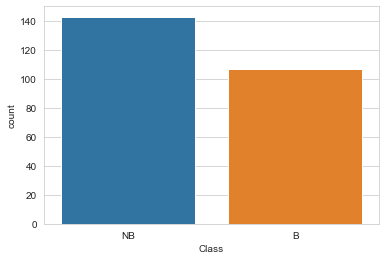

In [7]:
sns.set_style('whitegrid')
sns.countplot(df['Class'])

In [8]:
df['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

There are 36 more NB in the 'Class' column than B. So more Non-Bankruptcy overall. We can say that the dataset seems balanced.

Let's visulize the countplot of each feature in each class seperately to see the distribution of each class in the features.

<AxesSubplot:xlabel='Operating Risk', ylabel='count'>

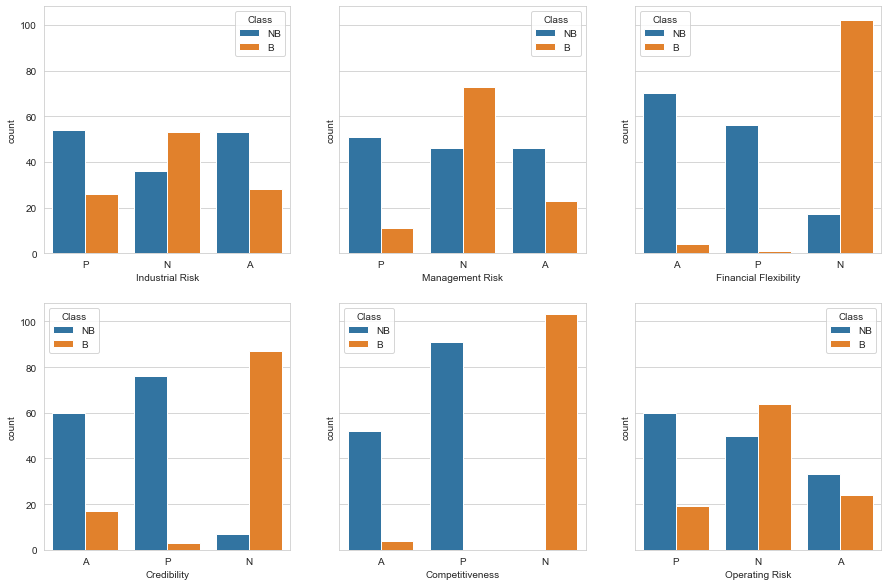

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

# Industrial Risk
sns.countplot(df['Industrial Risk'],hue= df['Class'], ax=axes[0][0])

# Management Risk
sns.countplot(df['Management Risk'],hue= df['Class'], ax=axes[0][1])

# Management Risk
sns.countplot(df['Financial Flexibility'],hue= df['Class'], ax=axes[0][2])

# Credibility
sns.countplot(df['Credibility'],hue= df['Class'], ax=axes[1][0])

# Competitiveness
sns.countplot(df['Competitiveness'],hue= df['Class'], ax=axes[1][1])

# Operating Risk
sns.countplot(df['Operating Risk'],hue= df['Class'], ax=axes[1][2])


From the above figures we can observe that **the Bankruptcy is very high for the negative value on all the features** and it is least for the positive values.

# 2. Data Preprocessing

First we need to convert the descriptive categorical data into numerical categorical data for the purpose of modeling. Therefore, I am going to apply **Label Encoding**.

In [10]:
fetures = df.columns
fetures

Index(['Industrial Risk', 'Management Risk', 'Financial Flexibility',
       'Credibility', 'Competitiveness', 'Operating Risk', 'Class'],
      dtype='object')

In [11]:
# the function that encode cetegorical text into categorical numbers
def encode_label_func(feat ,df):
    encode= LabelEncoder()
    df[feat] = encode.fit_transform(df[feat].astype(str))

In [12]:
for i in fetures:
    encode_label_func(i,df)

Let's check the dataset again

In [13]:
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Industrial Risk        250 non-null    int32
 1   Management Risk        250 non-null    int32
 2   Financial Flexibility  250 non-null    int32
 3   Credibility            250 non-null    int32
 4   Competitiveness        250 non-null    int32
 5   Operating Risk         250 non-null    int32
 6   Class                  250 non-null    int32
dtypes: int32(7)
memory usage: 7.0 KB


## Data Correlation

Now let's explore correlation between the features.

In [15]:
df.corr(method='pearson')

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
Industrial Risk,1.000000,0.110063,0.068694,-0.050432,0.060428,0.177573,0.015836
Management Risk,0.110063,1.000000,-0.018999,-0.006609,-0.132174,0.253851,0.100632
Financial Flexibility,0.068694,-0.018999,1.000000,-0.020124,0.150036,-0.064455,-0.047966
Credibility,-0.050432,-0.006609,-0.020124,1.000000,0.092155,0.054104,0.152045
Competitiveness,0.060428,-0.132174,0.150036,0.092155,1.000000,-0.073031,0.203521
Operating Risk,0.177573,0.253851,-0.064455,0.054104,-0.073031,1.000000,0.159147
Class,0.015836,0.100632,-0.047966,0.152045,0.203521,0.159147,1.000000


<AxesSubplot:>

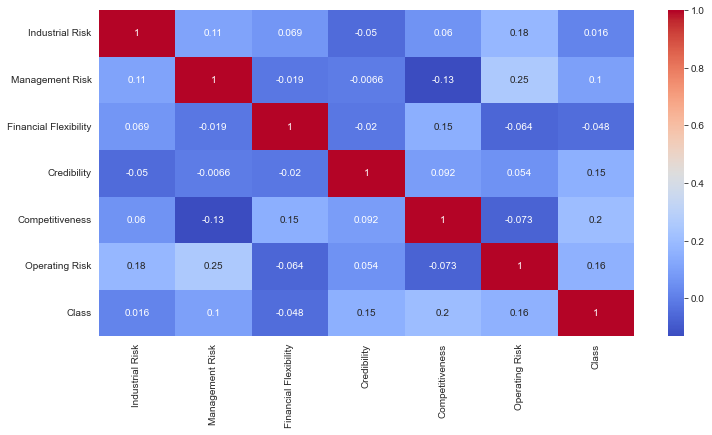

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(method='pearson'),annot=True,cmap='coolwarm')

In [17]:
features = df.drop(['Class'],axis=1)

<AxesSubplot:title={'center':'Correlation with Class'}>

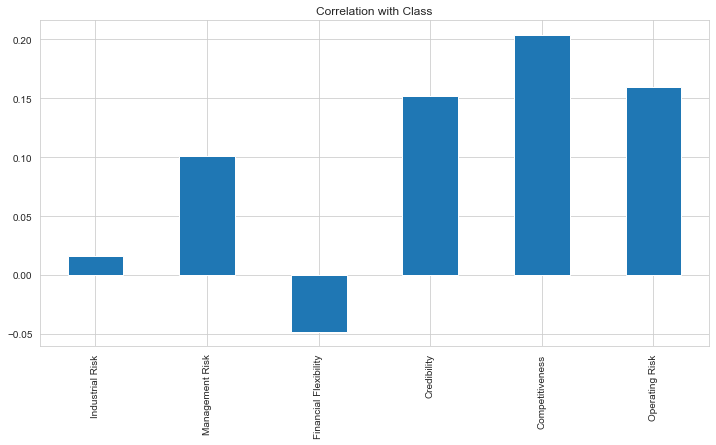

In [18]:
features.corrwith(df.Class).plot.bar(figsize = (12, 6), title = "Correlation with Class", rot = 90, grid = True)

**The correlation between features and the 'Class' is very low** accouring to the above tables and figures. However, the Bankruptcy is mostly correlated with the 'Competitiveness' column. Which means the higher is the market position, it is more posible to experience bankruptcy.

# 3.  Model Development

### Setting up the Features and the Target

In [19]:
X = df.drop('Class',axis=1)
y = df['Class']

###  Splitting Data to Train Test sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 101)

In [21]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", y_test.shape)

X_train shape: (200, 6)
X_test shape: (50, 6)
Y_train shape: (200,)
X_test shape: (50,)


Let's see the **distribition of classes** in test and train sets:

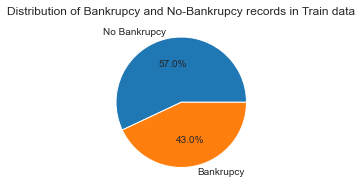

In [22]:
plt.figure(figsize = (5,3))
labels = ["No Bankrupcy", "Bankrupcy"]
plt.pie(y_train.value_counts().values,labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupcy and No-Bankrupcy records in Train data")
plt.show()

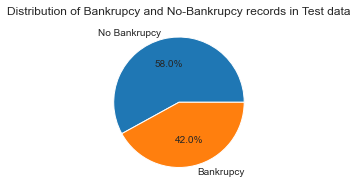

In [23]:
plt.figure(figsize = (5,3))
labels = ["No Bankrupcy", "Bankrupcy"]
plt.pie(y_test.value_counts().values,labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupcy and No-Bankrupcy records in Test data")
plt.show()

It can be clearly seen from the pie chart that the dataset is **balanced** and the distribition of classes in both sets are fair. So we will are good to go to the next step.

# Classification Models

### Cross Validation

Using Cross Validation can be benefitial as we can verify how accurate our model is on multiple and different subsets of data. 

In [24]:
kfold = KFold(n_splits=10,shuffle=True, random_state=10)

### Grid Search

In order to optimize a learning algorithms, we can apply grid search by specifying the parameters, and the possible values of those parameters. **The grid search then returns the best parameter values for our model**, after fitting the supplied data. This takes out the guess-work involved in seeking out the opitimal paramter values for a classifier.

In [25]:
def grid_search(model, grid_param):    
    grid = GridSearchCV(estimator=model,
                         param_grid=grid_param,
                         scoring='accuracy',
                         cv=10,
                         verbose=1,
                         n_jobs=-1)

    grid.fit(X_train, y_train)
    print("Best parameters: {}".format(grid.best_params_))
    model_best = grid.best_estimator_
    return model_best

### Model Evaluation

In [26]:
def model_eval_df(model):
    
    # cross validation
    cross_acc = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kfold, scoring='accuracy').mean()
    
    # Evaluation
    y_pred = model.predict(X_test)
    
    #confusion matrix
    sns.heatmap(confusion_matrix(y_test,y_pred) ,linewidths=0.5, annot=True, fmt='d', cmap='coolwarm')
    plt.title('Confusion Matrix')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.show()
    print('Classification Report : \n',classification_report(y_test,y_pred, target_names = ['B', 'NB' ]))
    
    acc= accuracy_score(y_test, y_pred)
    roc=roc_auc_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results = pd.DataFrame([[model, acc, cross_acc, prec, rec, f1,roc]],
                   columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    results
    
    return results

## Logistics Regression

In [27]:
logi = LogisticRegression(random_state = 0)

In [28]:
param_logi = { "C": np.logspace(-4, 4, 50),
               "penalty" : ['l1', 'l2']
             }
logi_best =  grid_search(logi, param_logi)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'C': 0.18420699693267145, 'penalty': 'l2'}


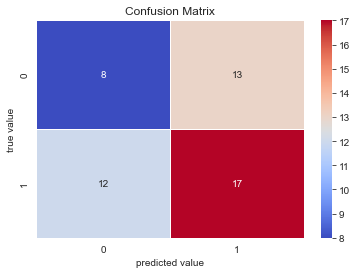

Classification Report : 
               precision    recall  f1-score   support

           B       0.40      0.38      0.39        21
          NB       0.57      0.59      0.58        29

    accuracy                           0.50        50
   macro avg       0.48      0.48      0.48        50
weighted avg       0.50      0.50      0.50        50



In [29]:
results = model_eval_df(logi_best)
#results

Here we are getting accuracy of 50%. As we have less number of rows in this dataset thats why we are getting less accuracy.

## K-Nearest Neighbors

For KNN algorithm I will test severl k in range 1-20 an then accourding to the train and test score xhoose the most conviniant k.

In [30]:
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

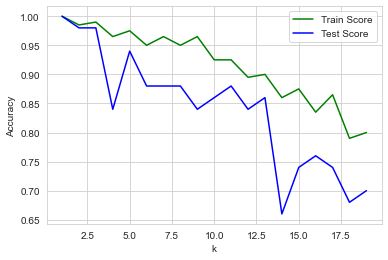

In [31]:
x_axis = range(1,20)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

There is bent at K=1 which tells us that this is the optimal number of clusters probably the dataset is having.
Let's try to get the optimum parameters using the GridSearch.

In [32]:
knn = KNeighborsClassifier()

In [33]:
param_knn = { "n_neighbors": range(1,20),
               "leaf_size": (20, 30, 40)
             }
knn_best =  grid_search(knn, param_knn)

Fitting 10 folds for each of 57 candidates, totalling 570 fits
Best parameters: {'leaf_size': 30, 'n_neighbors': 1}


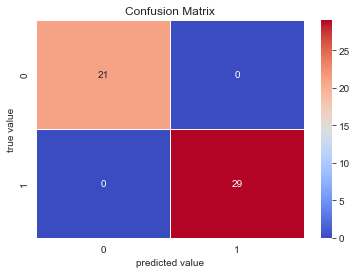

Classification Report : 
               precision    recall  f1-score   support

           B       1.00      1.00      1.00        21
          NB       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [34]:
results = results.append(model_eval_df(knn_best))
#results

## Decision Tree

In [35]:
dtree = DecisionTreeClassifier()

In [36]:
#parameter for gridsearchcv
param_dtree = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_split": range(1,5)
}

dtree_best =  grid_search(dtree, param_dtree)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


Now by getting the best model for the final evaluation we have:

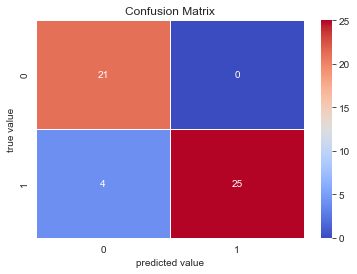

Classification Report : 
               precision    recall  f1-score   support

           B       0.84      1.00      0.91        21
          NB       1.00      0.86      0.93        29

    accuracy                           0.92        50
   macro avg       0.92      0.93      0.92        50
weighted avg       0.93      0.92      0.92        50



In [37]:
results = results.append(model_eval_df(dtree_best))
#results

## Support Vector Machine 

Lets find the best gamma nad C parmeters for the SVM

In [38]:
svm = SVC()

In [39]:
#parameter for gridsearchcv
param_svm = { "kernel": ['sigmoid', 'rbf'],
              "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
              "C" : [0.001, 0.01, 0.1, 1, 10, 100],
}

svm_best =  grid_search(svm, param_svm)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


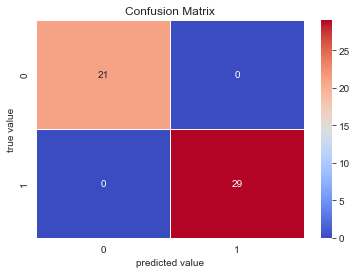

Classification Report : 
               precision    recall  f1-score   support

           B       1.00      1.00      1.00        21
          NB       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [40]:
results = results.append(model_eval_df(svm_best))
#results

## MLP

In [41]:
mlp = MLPClassifier()

In [42]:
param_mlp = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp_best =  grid_search(mlp, param_mlp)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best parameters: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


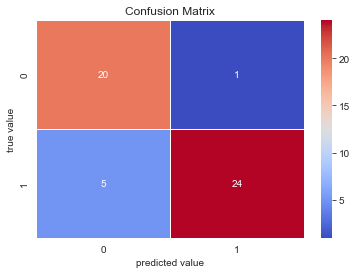

Classification Report : 
               precision    recall  f1-score   support

           B       0.80      0.95      0.87        21
          NB       0.96      0.83      0.89        29

    accuracy                           0.88        50
   macro avg       0.88      0.89      0.88        50
weighted avg       0.89      0.88      0.88        50



In [43]:
results = results.append(model_eval_df(mlp_best))
#results

## Random Forest

In [44]:
randforest = RandomForestClassifier()

In [45]:
param_rf = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

randforest_best =  grid_search(randforest, param_rf)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


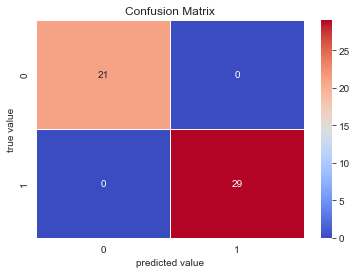

Classification Report : 
               precision    recall  f1-score   support

           B       1.00      1.00      1.00        21
          NB       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [46]:
results = results.append(model_eval_df(randforest_best))
#results

## Gradient Boosting

In [47]:
gradboost = GradientBoostingClassifier()

In [48]:
param_gb = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1],
    'subsample'    : [0.9, 0.5, 0.1],
    'n_estimators' : [500,1000, 1500],
    'max_depth'    : [4,8,10]
    }

gradboost_best =  grid_search(gradboost, param_gb)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best parameters: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.9}


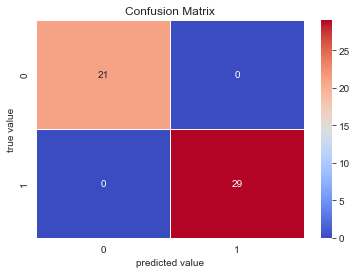

Classification Report : 
               precision    recall  f1-score   support

           B       1.00      1.00      1.00        21
          NB       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [49]:
results = results.append(model_eval_df(gradboost_best))
#results

In [50]:
results.reset_index(drop=True)

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,"LogisticRegression(C=0.18420699693267145, rand...",0.50,0.600,0.566667,0.586207,0.576271,0.483580
1,KNeighborsClassifier(n_neighbors=1),1.00,0.985,1.000000,1.000000,1.000000,1.000000
2,DecisionTreeClassifier(max_depth=4),0.92,1.000,1.000000,0.862069,0.925926,0.931034
3,"SVC(C=1, gamma=1)",1.00,0.990,1.000000,1.000000,1.000000,1.000000
4,"MLPClassifier(alpha=0.05, hidden_layer_sizes=(...",0.88,0.960,0.960000,0.827586,0.888889,0.889984
5,"(DecisionTreeClassifier(max_depth=4, max_featu...",1.00,0.995,1.000000,1.000000,1.000000,1.000000
6,([DecisionTreeRegressor(criterion='friedman_ms...,1.00,1.000,1.000000,1.000000,1.000000,1.000000


Based on the results,**KNN, SVM, Random Forest and Gradient Boosting** models has the highest Accuracy (100%) on this dataset, in other words, they have separated positive and negative examples perfectly.
The logistic regression has the poorest prediction of classes with 50 percent of failed predition.